This notebook contains analysis and plot generation of the series of 125 parameter-study runs in which weathering is switched on, and the uplifted material is rock.

Start by reading data from csv file.

In [8]:
import csv
import numpy as np


N = 125  # number of runs

# Create arrays
run_number = np.zeros(N, dtype=int)
dprime = np.zeros(N)
wprime = np.zeros(N)
w = np.zeros(N)
tau = np.zeros(N)
d = np.zeros(N)
max_ht = np.zeros(N)
mean_ht = np.zeros(N)
mean_slope = np.zeros(N)
mean_soil = np.zeros(N)
frac_cover = np.zeros(N)

i = -1
with open('grain_hill_wxing_results.csv', 'rb') as csvfile:
    myreader = csv.reader(csvfile)
    for row in myreader:
        if i > -1:
            run_number[i] = int(row[0])
            dprime[i] = float(row[1])
            wprime[i] = float(row[2])
            w[i] = float(row[3])
            tau[i] = float(row[4])
            d[i] = float(row[5])
            max_ht[i] = float(row[6])
            mean_ht[i] = float(row[7])
            mean_slope[i] = float(row[8])
            mean_soil[i] = float(row[9])
            frac_cover[i] = float(row[10])
        i += 1
csvfile.close()

In [20]:
# Define discrete values for d', w'
dpvals = np.array([0.1, 1.0, 10.0, 100.0, 1000.0])
wpvals = np.array([0.4, 1.265, 4.0, 12.649, 40.0])

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

psyms = ['k.', 'k+', 'k^', 'k*', 'ko']

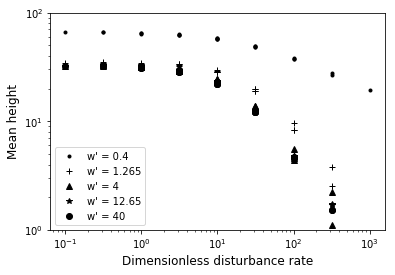

In [40]:
# Plot 1: mean height as function of d', grouped by w'
rounded_wp = np.round(wprime, 3)
symnum = 0
for wp in wpvals:
    pts = np.where(rounded_wp == wp)[0]
    plt.loglog(dprime[pts], mean_ht[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless disturbance rate', {'fontsize' : 12})
plt.ylabel('Mean height', {'fontsize' : 12})
plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
plt.ylim([1, 100])
plt.savefig('wx_mean_ht_vs_dist_rate.pdf')